In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gld_price_data.csv')
print(df.shape)

(2290, 6)


In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation Coefficient**

In [ ]:
correlation = df.corr()

<ipython-input-51-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

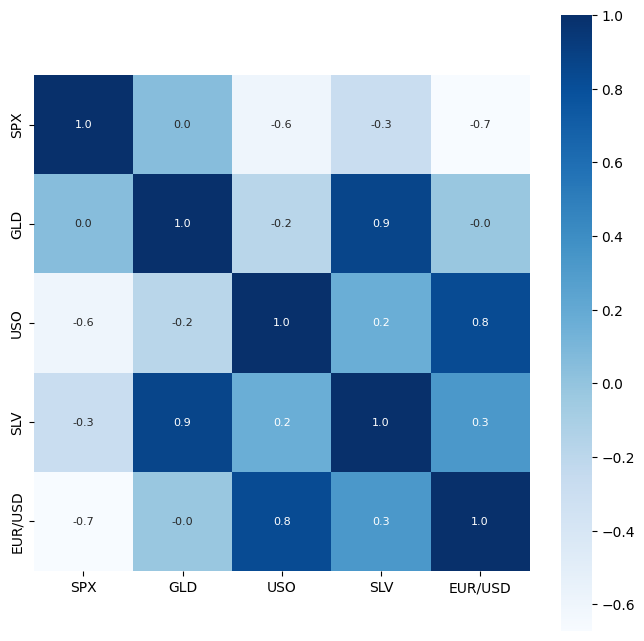

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
print(correlation['SPX'])

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64


<Axes: xlabel='SPX', ylabel='Count'>

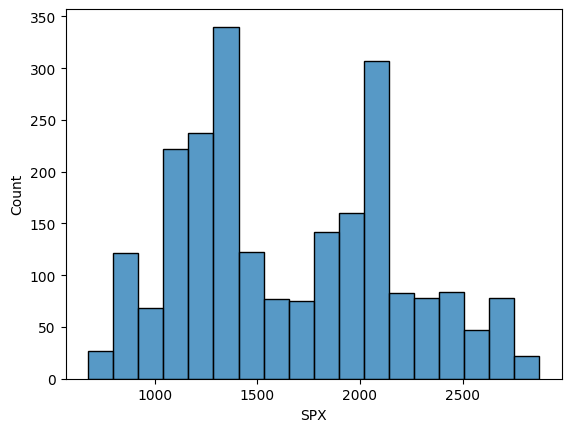

In [ ]:
sns.histplot(df['SPX'])

**Train Test Split**

In [ ]:
X= df.drop(['Date','SPX'],axis=1)
Y= df['SPX']

In [ ]:
print(X)
print(Y)

             GLD        USO      SLV   EUR/USD
0      84.860001  78.470001  15.1800  1.471692
1      85.570000  78.370003  15.2850  1.474491
2      85.129997  77.309998  15.1670  1.475492
3      84.769997  75.500000  15.0530  1.468299
4      86.779999  76.059998  15.5900  1.557099
...          ...        ...      ...       ...
2285  124.589996  14.060000  15.5100  1.186789
2286  124.330002  14.370000  15.5300  1.184722
2287  125.180000  14.410000  15.7400  1.191753
2288  124.489998  14.380000  15.5600  1.193118
2289  122.543800  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0       1447.160034
1       1447.160034
2       1411.630005
3       1416.180054
4       1390.189941
           ...     
2285    2671.919922
2286    2697.790039
2287    2723.070068
2288    2730.129883
2289    2725.780029
Name: SPX, Length: 2290, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Performance**

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[1341.82568006 1305.27372307 1903.11467388 2183.78824716 2359.48268798
 1368.31429318 1317.64839967 2474.26700664 1962.18090939 1978.60420283
 2066.45963125 1154.99761594 1587.66347515 1334.88549802 2068.06609386
 2336.34188703 1320.82699945 1460.00231814 1372.87587527 1262.78259637
 1559.211874   1711.0023902  1140.57919809 1322.22312141 2724.82780283
  989.69419241 1187.70439691 1810.61069202 1897.97379886 1377.27650514
  857.20140452 2694.38622315 1292.89348991 1928.73128894 1068.592982
 1243.39340931 2069.50606671 2074.99438216 1242.92409662 2092.68432621
 1101.3201014  1383.71311648 2675.63210696 1267.61128662 1311.73399408
 1798.82850216 2295.69990426 1955.3259291  1332.14750861 1965.67140244
  847.69549384 2101.85516096 2270.36172003 2004.00112316 2470.11806634
 1792.67719714 1488.14321304 1292.76330695 1334.14989741 1386.4046898
 1347.85141005 1375.61980223  782.41400398 2638.58235114 2682.05416511
 1415.55950905 1309.2915076  2527.28610366 1970.3487231  1045.08519535
 1249.639

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9612575682710548


In [ ]:
Y_test = list(Y_test)

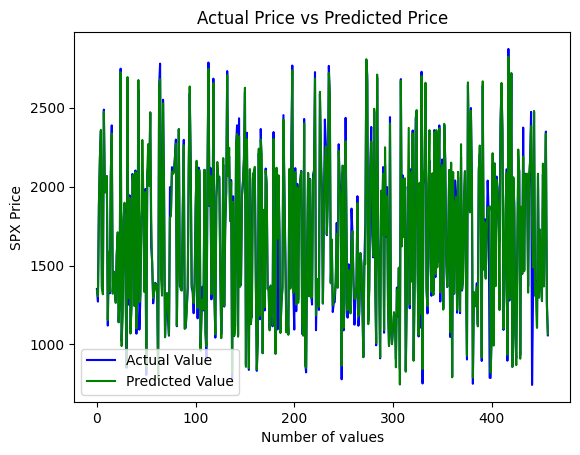

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='Green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SPX Price')
plt.legend()
plt.show()